## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import gc
import datetime

## 데이터셋 로드

In [2]:
path = './data/dataset/'
st = datetime.datetime.now()
train = pd.read_parquet(path + 'train.parquet')
test = pd.read_parquet(path + 'test.parquet')
ed = datetime.datetime.now()
print('Elapsed time : ', ed-st)

Elapsed time :  0:00:07.014070


In [3]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [4]:
train['base_date']= train['base_date'].astype('str')
test['base_date']= test['base_date'].astype('str')

train["year"] = pd.to_datetime(train["base_date"]).dt.year
train["month"] = pd.to_datetime(train["base_date"]).dt.month
train["day"] = pd.to_datetime(train["base_date"]).dt.day

test["year"] = pd.to_datetime(test["base_date"]).dt.year
test["month"] = pd.to_datetime(test["base_date"]).dt.month
test["day"] = pd.to_datetime(test["base_date"]).dt.day

train["day_int"] = pd.to_datetime(train["base_date"]).dt.weekday
train["day_int"] = train["day_int"].astype(int)

test["day_int"] = pd.to_datetime(test["base_date"]).dt.weekday
test["day_int"] = test["day_int"].astype(int)

train["start_turn_restricted"] = train["start_turn_restricted"].astype('bool')
train["end_turn_restricted"] = train["end_turn_restricted"].astype('bool')
test["start_turn_restricted"] = test["start_turn_restricted"].astype('bool')
test["end_turn_restricted"] = test["end_turn_restricted"].astype('bool')

train["weekend"] = train["day"].map(lambda x : True if x>=5 else False)
test["weekend"] = test["day"].map(lambda x : True if x>=5 else False)

label_name = "target"

feature_name = ['base_hour', 'lane_count', 'road_rating', 'multi_linked',
       'connect_code', 'maximum_speed_limit',
       'weight_restricted', 'height_restricted','start_turn_restricted',
       'end_turn_restricted','road_type', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'year',
       'month', 'day', 'day_int', 'weekend']

X_train = train[feature_name]
y_train = train[label_name]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

## 모델 학습 및 예측(RandomForest)

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test) * 100)
print('MAE score:', mean_absolute_error(y_test, y_pred_rf))

91.35530061200826
MAE score: 3.254299187989735


## 모델 학습 및 예측(XGBRegressor)

In [6]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print(model_xgb.score(X_test, y_test) * 100)
print('MAE score:', mean_absolute_error(y_test, y_pred_xgb))

88.89375318727627
MAE score: 3.8775990356693324


## 모델 학습 및 예측(LightGBM)

In [7]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)

print(model_lgbm.score(X_test, y_test) * 100)
print('MAE score:', mean_absolute_error(y_test, y_pred_lgbm))

84.14917705422116
MAE score: 4.821975219023248


In [9]:
import joblib

joblib.dump(model_rf, './models/random_forest.pkl')

['./models/random_forest.pkl']

## 데모

In [1]:
import joblib
import pandas as pd
import numpy as np
from datetime import datetime

loaded_model = joblib.load('./models/random_forest.pkl')

In [3]:
t = pd.read_csv('./models/road_information.csv')

base_date = input("Input base_date : ")
base_hour = int(input("Input base hour : "))

t['base_date'] = base_date
t["year"] = pd.to_datetime(t["base_date"]).dt.year
t["month"] = pd.to_datetime(t["base_date"]).dt.month
t["day"] = pd.to_datetime(t["base_date"]).dt.day
t["day_int"] = pd.to_datetime(t["base_date"]).dt.weekday
t["day_int"] = t["day_int"].astype(int)
t["start_turn_restricted"] = t["start_turn_restricted"].astype('bool')
t["end_turn_restricted"] = t["end_turn_restricted"].astype('bool')
t["weekend"] = t["day"].map(lambda x : True if x>=5 else False)
t['base_hour'] = base_hour

feature_name = ['base_hour', 'lane_count', 'road_rating', 'multi_linked',
       'connect_code', 'maximum_speed_limit',
       'weight_restricted', 'height_restricted','start_turn_restricted',
       'end_turn_restricted','road_type', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'year',
       'month', 'day', 'day_int', 'weekend']

t = t[feature_name]

Input base_date : 20230514
Input base hour : 2


In [4]:
pred = loaded_model.predict(t)
print(pred)

[52.0564072  34.97190421 76.50952421 31.97760606 49.1725643  33.93159143
 39.70800187 45.86357257 33.23084155 57.62986559 43.85946552 31.91098371
 69.45463532 53.8275913  62.84009798 37.04835299 37.73374055 65.24116991
 66.78384245 58.88467843 33.86793244 67.89932561 51.58481222 32.78476607
 51.73431648 44.96510747 58.70285691 51.2618146  58.24507262 67.72829505
 62.71056055 52.45787312 38.11223512 38.45278404 54.25874269 32.05435321
 40.79485391 25.85458107 20.38805392 28.1940822  36.75326434 58.90437147
 31.65696879 70.70566137 59.6773533  54.67144495 49.44024087 71.99455316
 77.2484302  43.15779779 55.53893516 40.27626166 37.32042685 31.72806935
 52.16098015 54.54523148 54.38831328 51.65583792 47.07226591 40.38695195
 37.47053678 72.63687845 34.21749394 31.72345396 44.71380422 62.31042388
 33.65549043 36.62086788 59.89133501 33.81100346 78.43907245 70.49393304
 59.47423373 43.94194767 36.14054346 49.37585987 31.4681093  53.33508228
 55.88482797 57.65909992 60.1609835  70.53863237 42

In [13]:
t['target'] = pred
t['traffic'] = [2 if s < 30 else 1 if 30 <= s <= 50 else 0 for s in t['target']] # 0: 원할 / 1: 보통 / 2: 혼잡
t['mean_coords'] = [[round((t['start_latitude'][i] + t['end_latitude'][i]) / 2, 6), round((t['start_longitude'][i] + t['end_longitude'][i]) / 2, 6)] for i in range(len(t))]
t

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,start_turn_restricted,end_turn_restricted,...,end_latitude,end_longitude,year,month,day,day_int,weekend,target,traffic,mean_coords
0,2,1,106,0,0,60.0,32400.0,0.0,True,True,...,33.427749,126.662335,2023,5,14,6,True,52.056407,0,"[33.427748, 126.662474]"
1,2,2,103,0,0,60.0,0.0,0.0,True,True,...,33.504811,126.526240,2023,5,14,6,True,34.971904,1,"[33.502771, 126.527673]"
2,2,2,103,0,0,80.0,0.0,0.0,True,True,...,33.280072,126.362147,2023,5,14,6,True,76.509524,0,"[33.279609, 126.365373]"
3,2,2,107,0,0,50.0,0.0,0.0,True,True,...,33.245565,126.566228,2023,5,14,6,True,31.977606,1,"[33.245823, 126.566716]"
4,2,2,103,0,0,80.0,0.0,0.0,True,True,...,33.462677,126.330152,2023,5,14,6,True,49.172564,1,"[33.462446, 126.328351]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2,2,107,0,0,60.0,0.0,0.0,True,True,...,33.308236,126.598690,2023,5,14,6,True,50.578023,0,"[33.307051, 126.598886]"
902,2,1,107,0,0,50.0,0.0,0.0,True,True,...,33.322018,126.645196,2023,5,14,6,True,50.578023,0,"[33.305193, 126.650298]"
903,2,2,107,0,0,50.0,0.0,0.0,True,True,...,33.248633,126.567766,2023,5,14,6,True,32.023067,1,"[33.247773, 126.567976]"
904,2,1,103,0,0,50.0,0.0,0.0,True,True,...,33.491567,126.680766,2023,5,14,6,True,50.171848,0,"[33.491648, 126.681517]"


In [14]:
t[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'mean_coords', 'target', 'traffic']]

,start_latitude,start_longitude,end_latitude,end_longitude,mean_coords,target,traffic
0,33.427747,126.662612,33.427749,126.662335,"[33.427748, 126.662474]",52.056407,0
1,33.500730,126.529107,33.504811,126.526240,"[33.502771, 126.527673]",34.971904,1
2,33.279145,126.368598,33.280072,126.362147,"[33.279609, 126.365373]",76.509524,0
3,33.246081,126.567204,33.245565,126.566228,"[33.245823, 126.566716]",31.977606,1
4,33.462214,126.326551,33.462677,126.330152,"[33.462446, 126.328351]",49.172564,1
...,...,...,...,...,...,...,...
901,33.305867,126.599081,33.308236,126.598690,"[33.307051, 126.598886]",50.578023,0
902,33.288368,126.655400,33.322018,126.645196,"[33.305193, 126.650298]",50.578023,0
903,33.246912,126.568186,33.248633,126.567766,"[33.247773, 126.567976]",32.023067,1
904,33.491729,126.682267,33.491567,126.680766,"[33.491648, 126.681517]",50.171848,0


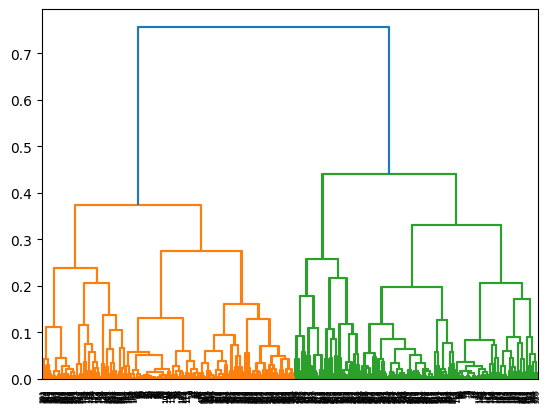

In [15]:
gby = t[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'target']].groupby(['start_latitude', 'start_longitude']).mean()
gby_end = t[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'target']].groupby(['end_latitude', 'end_longitude']).mean()
gby_df= gby.reset_index()
gby_end_df = gby_end.reset_index()

from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(gby_df[['start_latitude', 'start_longitude']], metric = 'euclidean')))
row_dist2 = pd.DataFrame(squareform(pdist(gby_end_df[['end_latitude', 'end_longitude']], metric ='euclidean')))

import scipy.cluster
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(gby_df[['start_latitude', 'start_longitude']], metric = 'euclidean'), method = 'complete')
row_clusters_end = linkage(pdist(gby_end_df[['end_latitude', 'end_longitude']], metric = 'euclidean'), method = 'complete')

from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters)
row_dendr_end = dendrogram(row_clusters_end)

a = list(range(len(row_dendr["leaves"])))
b = list(range(len(row_dendr_end["leaves"])))

sequence = np.array([row_dendr['leaves'], a])
seq_df = pd.DataFrame(sequence.T, columns = ["dendr", "a"])
seq_df = seq_df.sort_values("dendr")
seq_df = seq_df.set_index("dendr")

sequence2 = np.array([row_dendr_end['leaves'], b])
seq_end_df = pd.DataFrame(sequence2.T, columns = ["dendr", "b"])
seq_end_df = seq_end_df.sort_values("dendr")
seq_end_df = seq_end_df.set_index("dendr")


gby_df["label_encoding"] = seq_df["a"]
gby_end_df["label_encoding"] = seq_end_df["b"]

In [17]:
import folium
from folium import plugins

center = [33.4890113, 126.4983023]
m = folium.Map(location = center, zoom_start = 10)

loc = []
for i in range(len(a)):
    location_data = gby.index[i]
    mean_velocity = gby.iloc[i, 2]
    popup_char = gby_df.iloc[i, 5]
    #folium.Marker(location = location_data, radius = mean_velocity, color='blue', fill = True, fill_opacity = 0.5, tooltip = popup_char, popup = popup_char).add_to(m)
    folium.Circle(location = location_data, radius = mean_velocity, color='blue', fill = True, fill_opacity = 0.5).add_to(m)
    loc.append(location_data)
    
for i in range(len(a)):
    location_data = gby_end.index[i]
    mean_velocity = gby_end.iloc[i, 2]
    popup_char = gby_end_df.iloc[i, 5]
    #folium.Marker(location = location_data, radius = mean_velocity, color='blue', fill = True, fill_opacity = 0.5, tooltip = popup_char, popup = popup_char).add_to(m)
    folium.Circle(location = location_data, radius = mean_velocity, color='red', fill = True, fill_opacity = 0.5).add_to(m)
    loc.append(location_data)
    

plugins.MarkerCluster(loc).add_to(m)

m.save('./models/marker_sample.html')
m